## Экзамен python. Сорокин А.Д. РИМ-130907

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('salary_.csv', encoding='CP1251', sep=';')
df.sample(3)

,Т/Н,Должность,Ставка,Код подразд.,Оклад (ставка) по основному месту работы,Оклад (ставка) на работе по совместительству,Всего. руб.
683,302775,Доцент,1.45,170206.0,5173.68,2793.79,35919.20
450,3451,Доцент,0.30,17015.0,NaN,1361.53,3492.31
765,1711,Профессор,0.60,170204.0,6276.60,NaN,11800.01


### 1. (1 балл) Выведите Фонд оплаты труда(ФОТ):

In [3]:
# а) всей организации – float r1a;
r1a = df['Всего. руб.'].sum()
r1a

12018196.17

In [4]:
# б) в разрезе должностей – list r1b;
r1b = df[['Должность', 'Всего. руб.']].groupby('Должность').sum().reset_index().to_dict('records', index='Должность')
r1b

[{'Должность': 'Ассистент', 'Всего. руб.': 878028.88},
 {'Должность': 'Доцент', 'Всего. руб.': 6227156.38},
 {'Должность': 'Преподаватель', 'Всего. руб.': 564664.9},
 {'Должность': 'Профессор', 'Всего. руб.': 1540199.77},
 {'Должность': 'Старший преподаватель', 'Всего. руб.': 2808146.24}]

In [5]:
# в) ФОТ организации без учёта внешних совместителей – float r1c;
# г) ФОТ внешних совместителей – float r1d.
grouped_by_tb = df.groupby('Т/Н').sum()
# у внешних совместителей основной оклад отсутствует и присутствует оклад по совместительству
r1d = grouped_by_tb[(grouped_by_tb['Оклад (ставка) по основному месту работы'] == 0) &
                    (grouped_by_tb['Оклад (ставка) на работе по совместительству'] != 0)]['Всего. руб.'].sum()
# ФОТ организации был вычислен ранее, далее необходимо вычесть внешних совместителей
r1c = r1a - r1d
r1c, r1d


(10459905.26, 1558290.9100000001)

In [6]:
# list r1=[r1a, r1b, r1c, r1d]
r1 = [r1a, r1b, r1c, r1d]
r1

[12018196.17,
 [{'Должность': 'Ассистент', 'Всего. руб.': 878028.88},
  {'Должность': 'Доцент', 'Всего. руб.': 6227156.38},
  {'Должность': 'Преподаватель', 'Всего. руб.': 564664.9},
  {'Должность': 'Профессор', 'Всего. руб.': 1540199.77},
  {'Должность': 'Старший преподаватель', 'Всего. руб.': 2808146.24}],
 10459905.26,
 1558290.9100000001]

### 2. (1 балл) Выведите данные о структуре персонала по должностям и постройте круговую диаграмму

In [7]:
# DataFrame r2 с columns=[‘Должность’, ‘Количество’]
r2 = pd.DataFrame(df['Должность'].value_counts())
r2.columns = ['Количество']
r2

,Количество
Должность,
Доцент,337
Старший преподаватель,237
Ассистент,105
Профессор,80
Преподаватель,53


Text(0.5, 1.0, 'Данные о структуре персонала по должностям')

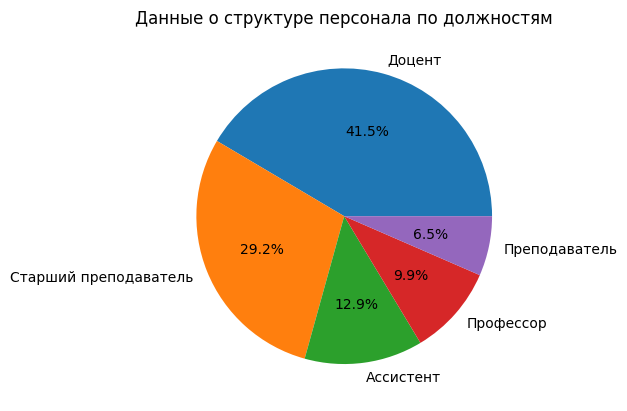

In [8]:
plt.pie(x=r2['Количество'], labels=r2.index, autopct='%1.1f%%')
plt.title('Данные о структуре персонала по должностям')

In [9]:
# решение с учётом того, что у одного человека может быть несколько одинаковых должностей в разных подразделениях (его учитываю за одного)
# а человек с разными должностями считается отдельно по должностям
other_r2 = pd.DataFrame(df.groupby(['Т/Н', 'Должность']).sum().reset_index().value_counts('Должность'))
other_r2.columns = ['Количество']
other_r2

,Количество
Должность,
Доцент,300
Старший преподаватель,216
Ассистент,101
Профессор,71
Преподаватель,52


Text(0.5, 1.0, 'Данные о структуре персонала по должностям (другое)')

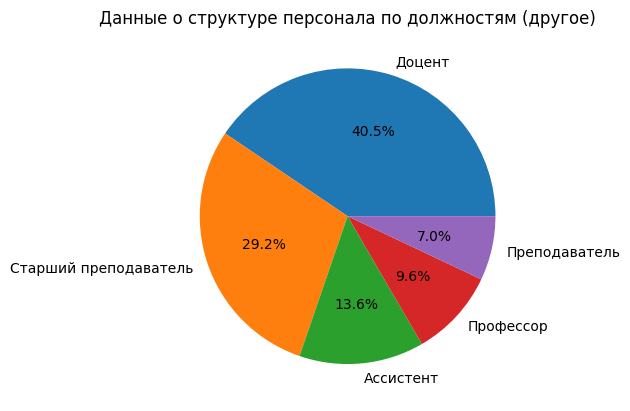

In [10]:
plt.pie(x=other_r2['Количество'], labels=other_r2.index, autopct='%1.1f%%')
plt.title('Данные о структуре персонала по должностям (другое)')

### 3. (1 балл) Проанализируйте заработную плату ассистентов: 
выведите минимальную (float r3a), среднюю (float r3b) и максимальную заработную плату (float r3c) по этой категории

In [11]:
# r3a = min, r3b = avg, r3c = max
assist_df = df[['Т/Н', 'Должность', 'Всего. руб.']].groupby(['Т/Н', 'Должность']).sum().reset_index()
assist_salary_stats = assist_df[assist_df['Должность'] == 'Ассистент']['Всего. руб.'].describe().to_dict()
r3a = assist_salary_stats['min']
r3b = assist_salary_stats['mean']
r3c = assist_salary_stats['max']
r3 = [r3a, r3b, r3c]
r3

[334.39999999999964, 8693.355247524752, 21484.59]

### 4. (1 балл) Проанализируйте доцентов-внешних совместителей. 
Выведите таблицу с их группировкой по табельному номеру, представьте в таблице общую величину ставки и сумму заработной платы (DataFrame r4a с columns=[‘Т/Н’, ‘Ставка’, ‘Оклад’]). 
Выведите их численность с учётом группировки – int r4b.

In [12]:
# согласно заданию необходимо получить столбец с ЗП, а не окладом, в целом оклад несёт только категориальную информацию
only_out = grouped_by_tb[(grouped_by_tb['Оклад (ставка) по основному месту работы'] == 0) &
                         (grouped_by_tb['Оклад (ставка) на работе по совместительству'] != 0)].index # получение табельных номеров только внешних совместителей
out_docent_df = df[df['Т/Н'].isin(only_out) & (df['Должность'] == 'Доцент')].groupby('Т/Н').sum().reset_index() # получение доцентов-внешних совместителей
r4a = out_docent_df.drop(['Должность',
                    'Код  подразд.',
                    'Оклад (ставка) по основному месту работы',
                    'Оклад (ставка) на работе по совместительству'], axis=1).reset_index(drop=True)
r4b = out_docent_df['Т/Н'].count()
r4 = [r4a, r4b]
r4

[       Т/Н  Ставка  Всего. руб.
 0     1341    0.25     12093.36
 1     1469    0.50      8355.50
 2     2397    0.50      8355.50
 3     2652    0.50      8355.50
 4     2797    0.50     22764.48
 5     4232    0.50      8197.72
 6     4420    0.50     15668.67
 7     5196    0.30      6005.24
 8     5601    0.25     26317.74
 9     5721    0.38      6565.26
 10    9709    0.50     24186.70
 11    9931    0.25     12093.36
 12   70184    0.50      7119.68
 13   74235    0.50     21341.70
 14  100784    0.50      7864.00
 15  102413    0.50     23980.06
 16  103197    0.15      2359.21
 17  104509    0.40      6291.20
 18  104690    0.50     15600.98
 19  105337    0.50     19996.90
 20  106199    0.50     22792.48
 21  164665    0.50      5011.88
 22  173123    0.50      5389.38
 23  174266    0.30     13658.80
 24  302429    0.50     14358.72
 25  302455    0.30      8008.72
 26  302514    0.50     24186.70
 27  302689    0.50     22764.48
 28  302832    0.50     24492.09
 29  30285

### 5. (1 балл) Проанализируйте заработную плату работников (с учётом совместительства), работающих в данной организации по основному месту работы.
Выведите минимальную (float r5a), среднюю (float r5b) и максимальную заработную плату (float r5c) по этой категории.

In [13]:
only_local_salary = grouped_by_tb[grouped_by_tb['Оклад (ставка) по основному месту работы'] != 0]['Всего. руб.'] # получение зарплат только с основными работниками
r5a = only_local_salary.min()
r5b = only_local_salary.mean()
r5c = only_local_salary.max()
r5 = [r5a, r5b, r5c]
r5

[805.5, 17596.471313131315, 55773.53]

### 6. (1 балл) Проведите анализ ставок внешних совместителей: 
выведите минимальную (float r6a), среднюю (float r6a) и максимальную ставку (float r6a) по этой категории.

In [14]:
only_out_df = df[df['Т/Н'].isin(only_out)] # получение таблицы только с внешними совместителями
r6a = only_out_df['Ставка'].min()
r6b = only_out_df['Ставка'].mean()
r6c = only_out_df['Ставка'].max()
r6 = [r6a, r6b, r6c]
r6, only_out_df['Ставка'].describe()

([0.05, 0.365, 0.5],
 count    152.000000
 mean       0.365000
 std        0.137533
 min        0.050000
 25%        0.250000
 50%        0.400000
 75%        0.500000
 max        0.500000
 Name: Ставка, dtype: float64)

### 7. (1 балл) Выведите список доцентов, работающих на 1,0 ст.

In [15]:
r7 = df[(df['Должность'] == 'Доцент') & (df['Ставка'] == 1)][['Т/Н', 'Ставка']]
r7

,Т/Н,Ставка
8,74317,1.0
23,1651,1.0
35,540,1.0
53,2328,1.0
105,1204,1.0
148,103707,1.0
167,165021,1.0
191,114,1.0
251,70812,1.0
255,2937,1.0


### 8. (1 балл) Найдите самого незагруженного по основному месту работы сотрудника.

In [16]:
only_local = grouped_by_tb[(grouped_by_tb['Оклад (ставка) по основному месту работы'] != 0)].index # получение табельных номеров только внутренних сотрудников
least_loaded = df[df['Т/Н'].isin(only_local) & df['Оклад (ставка) по основному месту работы'].notna()].sort_values('Ставка').head(1)
r8 = least_loaded[['Т/Н', 'Ставка']]
r8

,Т/Н,Ставка
308,303612,0.05


### Результат

In [17]:
r = [r1, r2, r3, r4, r5, r6, r7, r8]
r

[[12018196.17,
  [{'Должность': 'Ассистент', 'Всего. руб.': 878028.88},
   {'Должность': 'Доцент', 'Всего. руб.': 6227156.38},
   {'Должность': 'Преподаватель', 'Всего. руб.': 564664.9},
   {'Должность': 'Профессор', 'Всего. руб.': 1540199.77},
   {'Должность': 'Старший преподаватель', 'Всего. руб.': 2808146.24}],
  10459905.26,
  1558290.9100000001],
                        Количество
 Должность                        
 Доцент                        337
 Старший преподаватель         237
 Ассистент                     105
 Профессор                      80
 Преподаватель                  53,
 [334.39999999999964, 8693.355247524752, 21484.59],
 [       Т/Н  Ставка  Всего. руб.
  0     1341    0.25     12093.36
  1     1469    0.50      8355.50
  2     2397    0.50      8355.50
  3     2652    0.50      8355.50
  4     2797    0.50     22764.48
  5     4232    0.50      8197.72
  6     4420    0.50     15668.67
  7     5196    0.30      6005.24
  8     5601    0.25     26317.74
  9     

### 9. (2 балла) Постройте графики формирования ФОТ от меньших зарплат к большим для:

    а) всей организации;

    б) работников, чьё основное место работы находится в организации (с учётом внутреннего совместительства);

    в) внешних совместителей.


Text(0.5, 1.0, 'Данные о структуре персонала по должностям')

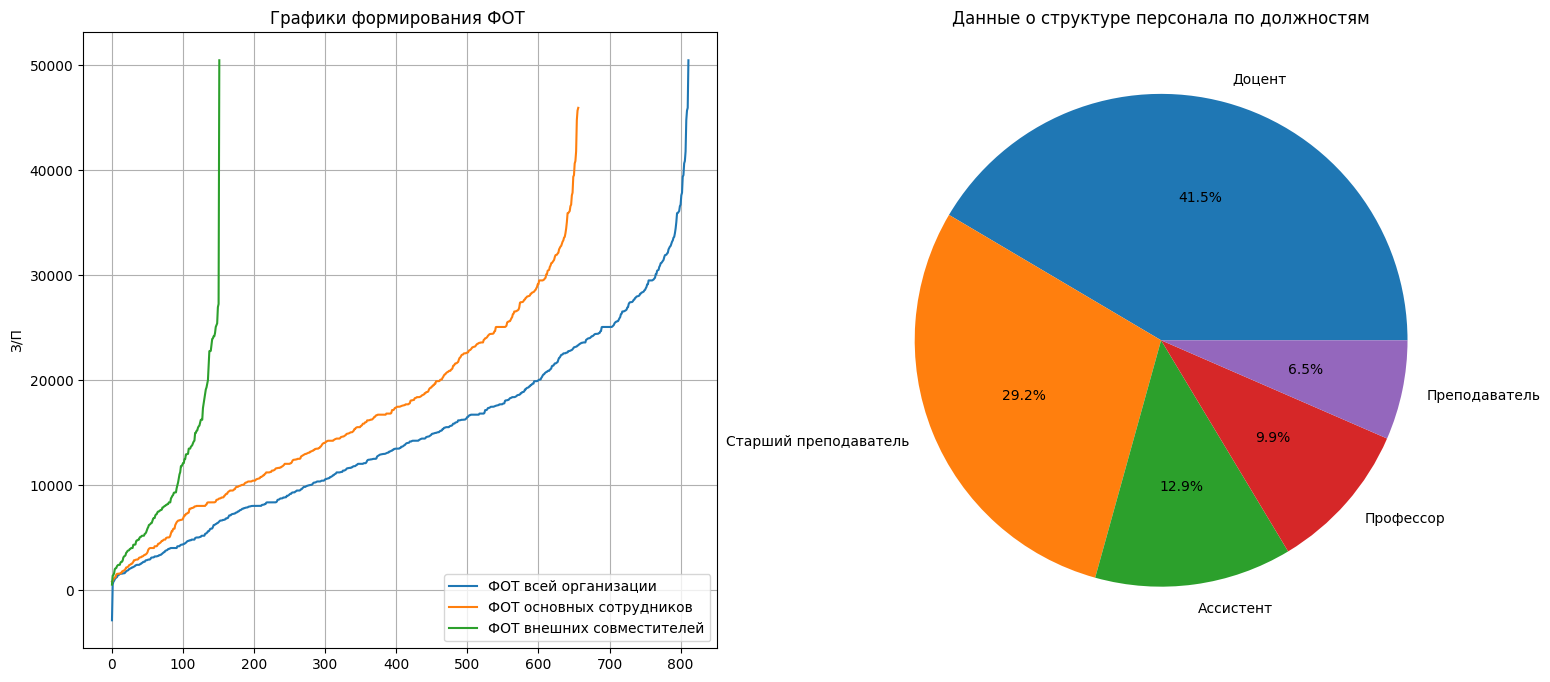

In [18]:
df = df.sort_values('Всего. руб.', ascending=True).reset_index(drop=True)
plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
X_1 = df.index
Y_1 = df['Всего. руб.']
X_2 = df[df['Т/Н'].isin(only_local)].reset_index().index
Y_2 = df[df['Т/Н'].isin(only_local)].reset_index()['Всего. руб.']
X_3 = df[df['Т/Н'].isin(only_out)].reset_index().index
Y_3 = df[df['Т/Н'].isin(only_out)].reset_index()['Всего. руб.']
plt.plot(X_1, Y_1, label='ФОТ всей организации')
plt.plot(X_2, Y_2, label='ФОТ основных сотрудников')
plt.plot(X_3, Y_3, label='ФОТ внешних совместителей')
plt.title('Графики формирования ФОТ ')
plt.ylabel('З/П')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.pie(x=r2['Количество'], labels=r2.index, autopct='%1.1f%%')
plt.title('Данные о структуре персонала по должностям')

In [19]:
len(only_local), len(only_out), len(only_local)+len(only_out) # проверил всех ли захватил в отдельных выборках на местных и внешних

(594, 142, 736)

In [20]:
len(df['Т/Н'].drop_duplicates()) # посмотрел суммарное количество всех сотрудников в таблице и увидел, что 2х не хватает

738

In [21]:
df[df['Оклад (ставка) на работе по совместительству'].isna() & df['Оклад (ставка) по основному месту работы'].isna()] # два не местных и не внешних

,Т/Н,Должность,Ставка,Код подразд.,Оклад (ставка) по основному месту работы,Оклад (ставка) на работе по совместительству,Всего. руб.
0,303082,Ассистент,1.25,170607.0,NaN,NaN,-2874.55
62,303082,Ассистент,1.00,170607.0,NaN,NaN,3208.95
171,302684,Преподаватель,0.50,170702.0,NaN,NaN,7266.90


In [22]:
303082 in only_local, 302684 in only_local, 303082 in only_out, 302684 in only_out # их нет нигде

(False, False, False, False)

In [23]:
# проверка на пересечение
for num in only_local:
    for num_out in only_out:
        if num == num_out:
            print(num, num_out)